<a href="https://colab.research.google.com/github/Snigdha-Gayathri/DataMiningexp3/blob/main/TVshowsAprioriAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install squarify

Shape of the dataset:  (5369, 12)
First few rows of the dataset:
    0   1                 2     3    4       5                6        7   \
0  NaN  ID             Title  Year  Age    IMDb  Rotten Tomatoes  Netflix   
1  0.0   1      Breaking Bad  2008  18+  9.4/10          100/100        1   
2  1.0   2   Stranger Things  2016  16+  8.7/10           96/100        1   
3  2.0   3   Attack on Titan  2013  18+  9.0/10           95/100        1   
4  3.0   4  Better Call Saul  2015  18+  8.8/10           94/100        1   

     8            9        10    11  
0  Hulu  Prime Video  Disney+  Type  
1     0            0        0     1  
2     0            0        0     1  
3     1            0        0     1  
4     0            0        0     1  


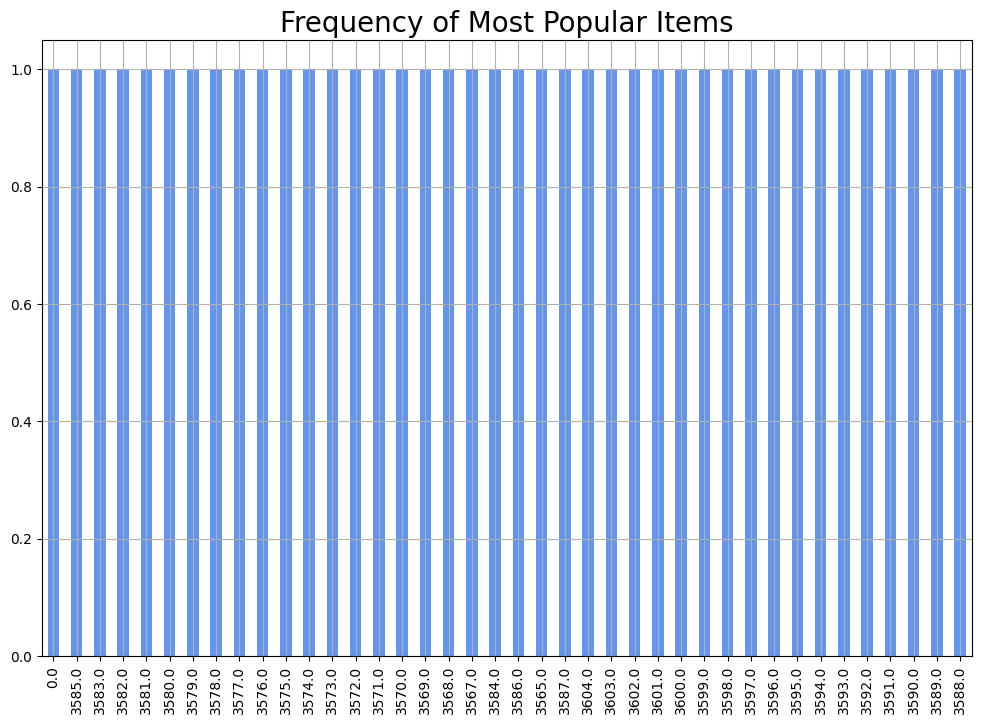

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

data=pd.read_csv('/content/tv_shows.csv',header=None)

print("Shape of the dataset: ", data.shape)

print("First few rows of the dataset:")
print(data.head())

plt.rcParams['figure.figsize'] = (12, 8)

color = plt.cm.copper(np.linspace(0, 1, 40))


data[0].value_counts().head(40).plot.bar(color='cornflowerblue')
plt.title('Frequency of Most Popular Items', fontsize=20)

plt.xticks(rotation=90)

plt.grid()

plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dist-packages/squarify/__init__.py:174: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return list(sizes)
/usr/local/lib/python3.10/dis

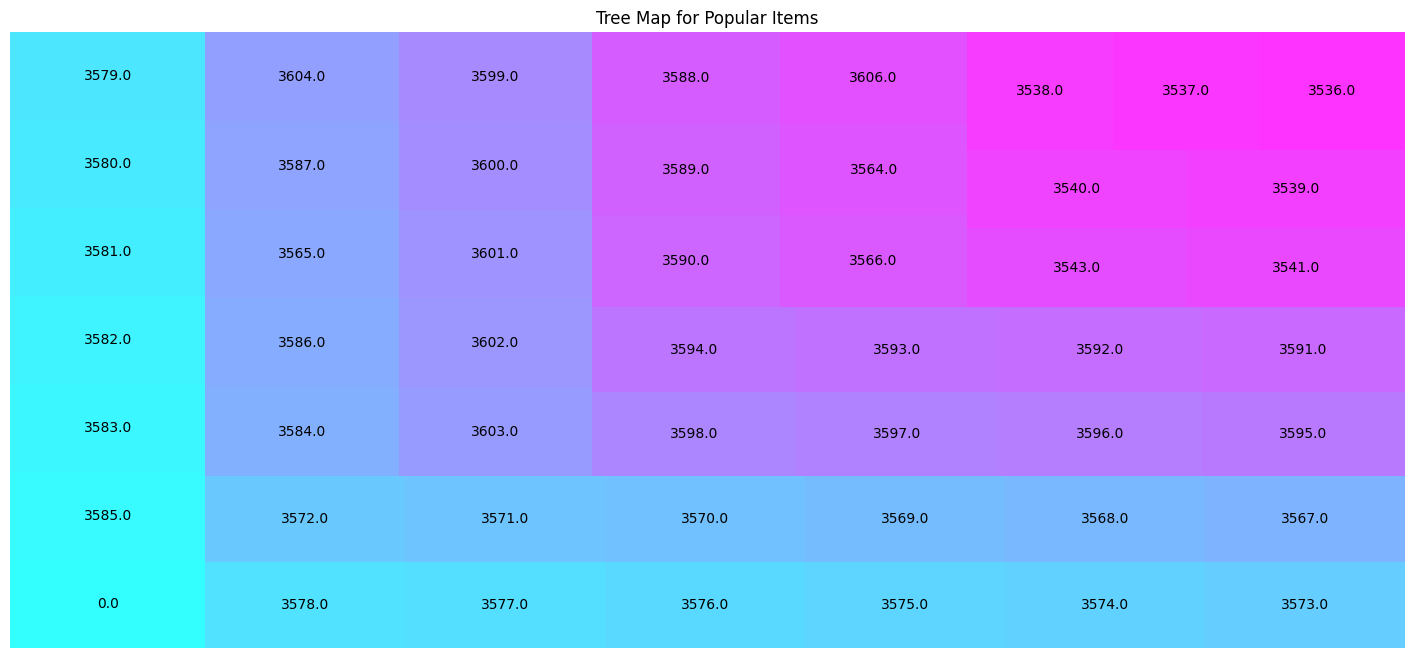

In [4]:
y = data[0].value_counts().head(50).to_frame()

y.index

plt.rcParams['figure.figsize'] = (18, 8)

color = plt.cm.cool(np.linspace(0, 1, 50))

squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)


plt.title('Tree Map for Popular Items')

plt.axis('off')

plt.show()



In [5]:

data['food'] = 'Food'

food = data.truncate(before=-1, after=15)

import networkx as nx

food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [6]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

pos = nx.spring_layout(food)

color = plt.cm.Wistia(np.linspace(0, 15, 1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


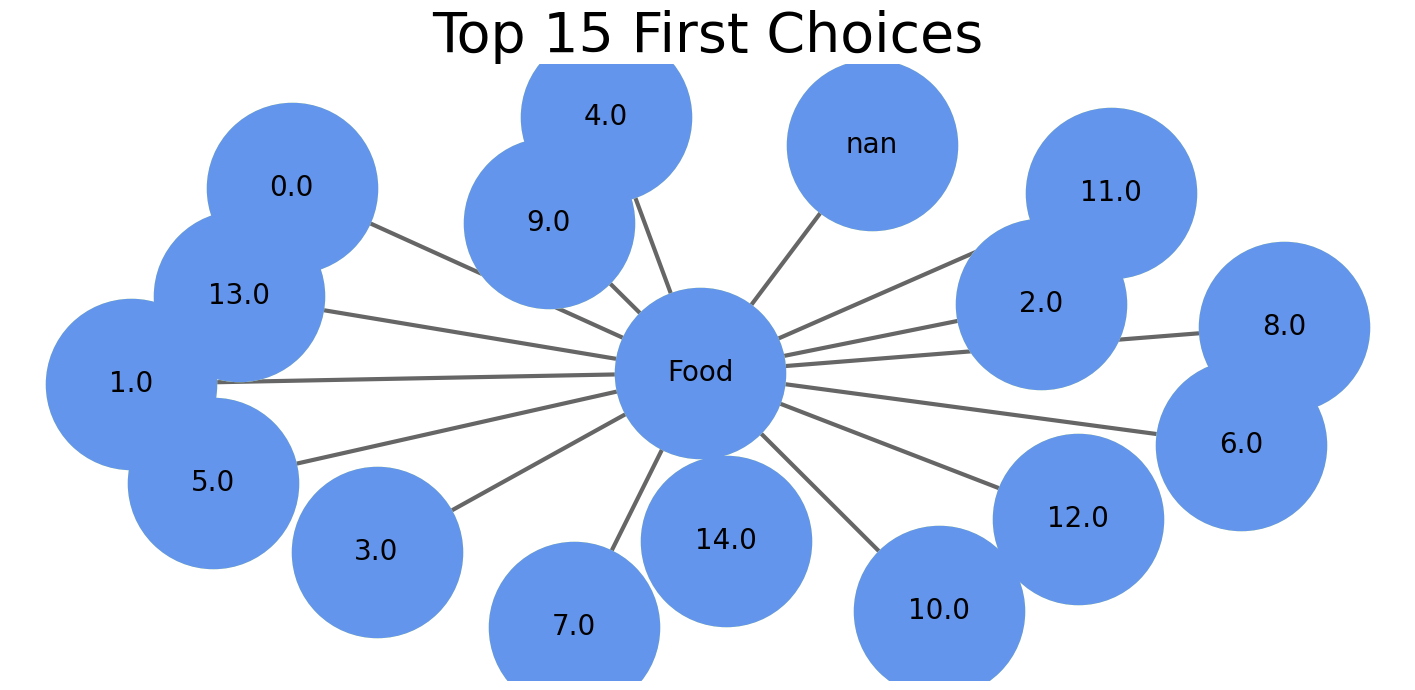

In [7]:

nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)

nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color='cornflowerblue')


nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')

plt.axis('off')

plt.grid()

plt.title('Top 15 First Choices', fontsize=40)

plt.show()

transactions = []
for i in range(len(data)):
 transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])

te = TransactionEncoder()

te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)


In [8]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)

Frequent Itemsets with at least 5% support:
      support                   itemsets
0    0.999627                        (0)
1    0.999814                        (1)
2    0.056621                   (10/100)
3    0.185323                      (16+)
4    0.159061                      (18+)
..        ...                        ...
114  0.065375       (nan, 0, Food, 2017)
115  0.056621     (1, nan, 10/100, Food)
116  0.065375       (1, nan, 2017, Food)
117  0.056621  (Food, 10/100, 1, nan, 0)
118  0.065375    (Food, 2017, 1, nan, 0)

[119 rows x 2 columns]
